In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils
from keras.models import load_model

import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from keras.preprocessing import image
from natsort import natsorted
from tqdm import tqdm
import json

In [77]:
path = r'D:\2020Spring\636_project\final_video\1800_4/'
files= os.listdir(path)
files = natsorted(files)

In [78]:
test = []
for i in tqdm(range(len(files))):
        img = image.load_img(path + files[i])
        img = np.float32(img)
        img = cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)
        img = image.img_to_array(img)
        test.append(img)

100%|██████████| 56/56 [00:00<00:00, 64.86it/s]


In [79]:
sample_num = int(len(test)/14)
test = np.reshape(test,(sample_num,14,224,224,3))
test.shape

(4, 14, 224, 224, 3)

In [80]:
test = test.astype('float32')
test -= np.mean(test)
test /=np.max(test)

In [14]:
model = load_model('my_model_P8_233.h5')

In [81]:
prediction = model.predict_classes(test)

[0 0 0 0]


"\nprint(timelabel_l)\nwith open('Cough8_5.json', 'w') as f:\n    json.dump(timelabel_l, f)\n"

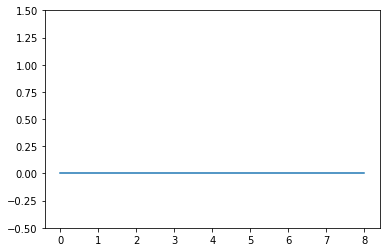

In [82]:
timelabel = np.zeros((sample_num * 2, 2))
time = np.arange(0,sample_num * 2 + 1)
Pred_of_Time = []
count = 0
Pred_of_Time.append(0)
print(prediction)
for i in range(sample_num):
    Pred_of_Time.append(prediction[i])
    Pred_of_Time.append(prediction[i])
'''
for i in range(len(time)):
    if (count == 0):
        Pred_of_Time.append(prediction[0][1])
    Pred_of_Time.append(prediction[0][1])
    timelabel[i][0] = time[i]
    timelabel[i][1] = Pred_of_Time[i]
timelabel_l = timelabel.tolist()
'''
plt.ylim((-0.5,1.5))
plt.plot(time, Pred_of_Time)
'''
print(timelabel_l)
with open('Cough8_5.json', 'w') as f:
    json.dump(timelabel_l, f)
'''

In [83]:
path = r'D:\2020Spring\636_project\final_video\label_fig/'
path_jpg = r'D:\2020Spring\636_project\final_video\label_fig_jpg/'
files= os.listdir(path)
files = natsorted(files)

In [84]:
for filename in os.listdir(path):
    if os.path.splitext(filename)[1] == '.png':
        # print(filename)
        img = cv2.imread(path + filename)
        print(filename.replace(".png",".jpg"))
        newfilename = filename.replace(".png",".jpg")
        # cv2.imshow("Image",img)
        # cv2.waitKey(0)
        cv2.imwrite(path_jpg + newfilename,img)

1000_2_Part 8.jpg
1100_2_Part 8(3).jpg
1200_2_Part 8(3).jpg
1300_2_Part 8(3).jpg
1400_1_Part 8(3).jpg
1400_2_Part 8(3).jpg
1400_3_Part 8(3).jpg
1400_4_Part 8(3).jpg
1500_1_Part 8(3).jpg
1600_2_Part 8(3).jpg
1700_3_Part 8(3).jpg
1800_4_Part 8(3).jpg
